In [8]:
# Run these in your terminal in order

# !pip install bertopic

# pip install -r requirements.txt install bertopic

# pip uninstall transformers bertopic
# pip install transformers bertopic

# !pip install spacytextblob
# python -m spacy download en_core_web_sm

In [9]:
import pandas as pd

#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import statistics

import nltk
from nltk.corpus import stopwords
from nltk import ngrams

import re

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from bertopic import BERTopic

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.cluster import KMeans


In [10]:
#Amado's csv to df 

df_comments = pd.read_csv('/Users/amadouyehara/Desktop/Spring 2024/Applied Analytics & Predictive Modeling/Project 1/opiates_comments6_LIWC.csv')
df_submissions = pd.read_csv('/Users/amadouyehara/Desktop/Spring 2024/Applied Analytics & Predictive Modeling/Project 1/opiates_submissions6_LIWC.csv', low_memory=False)


In [11]:
#Kaily's csv to df

# df_comments = pd.read_csv("C:/Users/Kaily Mejia/Dropbox/Graduate Courses/Applied and Predictive Modeling/Final Project/opiates_comments6_LIWC.csv" )
# df_submissions = pd.read_csv('C:/Users/Kaily Mejia/Dropbox/Graduate Courses/Applied and Predictive Modeling/Final Project/opiates_submissions6_LIWC.csv', low_memory = False)


In [12]:
#Structure of Comments dataset
df_comments.head()

,author,created_utc,score,subreddit,WC,Analytic,Clout,Authentic,Tone,WPS,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,BoofDontShoot,1659067065,1,opiates,5,8.69,50.00,1.00,25.77,2.50,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0
1,Busy_Background_195,1659067044,1,opiates,55,32.58,13.76,14.10,1.00,13.75,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,5.45,3.64,0.0
2,Wolf_Double,1659066949,1,opiates,6,1.00,95.20,23.51,99.00,6.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0
3,Knowagoraaa,1659066905,1,opiates,39,71.92,60.13,99.00,73.64,13.00,...,0.0,0.0,0.0,0.0,0.0,2.56,0.00,5.13,0.00,0.0
4,Busy_Background_195,1659066875,1,opiates,75,24.37,29.68,14.56,2.41,25.00,...,0.0,0.0,0.0,0.0,0.0,0.00,2.67,4.00,0.00,0.0


In [13]:
#Structure of Submissions dataset
df_submissions.head()

,author,title,created_utc,score,subreddit,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Odd-Pizza-1079,How much tylenol is too much? Asking for a fri...,1.659067e+09,1,opiates,12.0,18.82,79.76,1.79,25.77,...,0.0,0.0,0.00,8.33,0.00,0.00,0.0,0.0,16.67,0.00
1,Global_Face_4708,Gabapentin/Lyrica/Clonidine Through Telehealth?,1.659065e+09,1,opiates,5.0,99.00,50.00,1.00,25.77,...,0.0,0.0,0.00,20.00,0.00,0.00,0.0,0.0,0.00,40.00
2,Bluebeamtwinfn,Opiates prolonging finish/enhancing sex,1.659064e+09,1,opiates,5.0,93.26,50.00,43.37,25.77,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,20.00
3,iLoveLuckiii,Boost your oxy high! &amp; Save money! (USE ON...,1.659063e+09,1,opiates,13.0,82.82,93.79,94.81,99.00,...,0.0,0.0,7.69,0.00,15.38,0.00,0.0,0.0,15.38,7.69
4,Downtown_Syrup4635,IOP Detox while working 9-5??,1.659061e+09,1,opiates,6.0,62.04,50.00,23.51,25.77,...,0.0,0.0,0.00,33.33,0.00,16.67,0.0,0.0,0.00,0.00


In [14]:
# import pandas as pd

# # Assuming df_submissions is your DataFrame
# # Load your DataFrame or create it
# # Example:
# # df_submissions = pd.read_csv('your_file.csv')

# # Sort the DataFrame based on the 'score' column in descending order
# df_sorted = df_submissions.sort_values(by='score', ascending=True)

# # Select the top 10 highest scores
# top_10_highest_scores = df_sorted.head(10)

# # Display the selected columns
# selected_columns = ['author', 'title', 'score', 'season']
# top_10_highest_scores[selected_columns]


In [15]:
# num_columns = df_comments.shape[1]

# print("Number of columns in the DataFrame:", num_columns)

In [16]:
#Removing null values
print(len(df_comments))
df_comments = df_comments.dropna()
print(len(df_comments))

print(len(df_submissions))
df_submissions = df_submissions.dropna()
print(len(df_submissions))

1014397
1014397
79676
79674


In [17]:
#only using numerical values for heatmap 

df_submissions['score'] = pd.to_numeric(df_submissions['score'], errors='coerce')
df_numeric = df_submissions.select_dtypes(include=['float64', 'int64'])

# plt.figure(figsize=(100, 80))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix Heatmap')
# plt.show()

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()
score_correlation = correlation_matrix['score'].abs().sort_values(ascending=False)

# Get the top 10 most correlated columns (excluding 'score' itself)
top_10_correlated = score_correlation[1:11]  # Exclude the 'score' column itself

# Print the top 10 correlated columns and their correlation values
print("Top 10 columns most correlated with 'score':")
print(top_10_correlated)

Top 10 columns most correlated with 'score':
created_utc    0.104814
ppron          0.035615
pronoun        0.031869
Dic            0.030363
anger          0.029796
i              0.026832
Authentic      0.025632
function       0.025611
we             0.025185
swear          0.024707
Name: score, dtype: float64


In [18]:
df_comments = df_comments[['author', 'created_utc','score', 'WC', 'Tone','posemo', 'negemo','anger', 'anx', 'sad', 'affect']]
df_submissions = df_submissions[['author', 'title', 'created_utc','score', 'WC', 'Tone', 'posemo', 'negemo','anger', 'anx', 'sad', 'affect']]

In [19]:
dtypes = pd.DataFrame(df_submissions.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df_submissions.nunique().sort_values(ascending=True)
dtypes["Null Values"]=df_submissions.isnull().sum()
dtypes["% null Values"]=df_submissions.isnull().sum()/len(df_submissions)
dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
author,object,34175,0,0.000000
title,object,74710,0,0.000000
created_utc,float64,79580,0,0.000000
score,int64,200,0,0.000000
WC,float64,70,0,0.000000
Tone,float64,120,0,0.000000
posemo,float64,198,0,0.000000
negemo,float64,196,0,0.000000
anger,float64,126,0,0.000000
anx,float64,106,0,0.000000


In [20]:
dtypes = pd.DataFrame(df_comments.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df_comments.nunique().sort_values(ascending=True)
dtypes["Null Values"]=df_comments.isnull().sum()
dtypes["% null Values"]=df_comments.isnull().sum()/len(df_submissions)
dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

#df_comments has no null values

,Data Type,Unique Values,Null Values,% null Values
author,object,58868,0,0.000000
created_utc,int64,1005848,0,0.000000
score,int64,188,0,0.000000
WC,int64,1049,0,0.000000
Tone,float64,4364,0,0.000000
posemo,float64,1264,0,0.000000
negemo,float64,1267,0,0.000000
anger,float64,886,0,0.000000
anx,float64,596,0,0.000000
sad,float64,618,0,0.000000


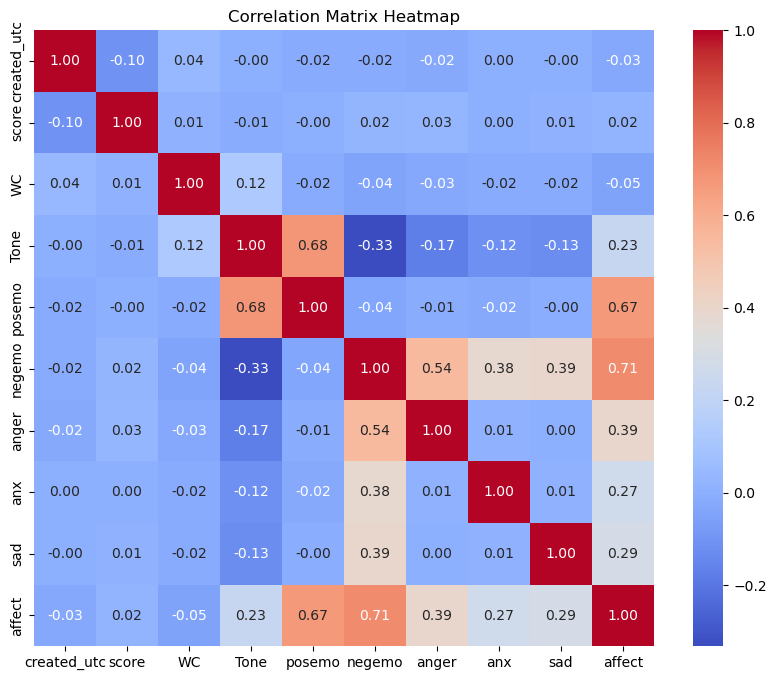

In [21]:
#only using numerical values for heatmap 

df_submissions1 = df_submissions.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_submissions1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


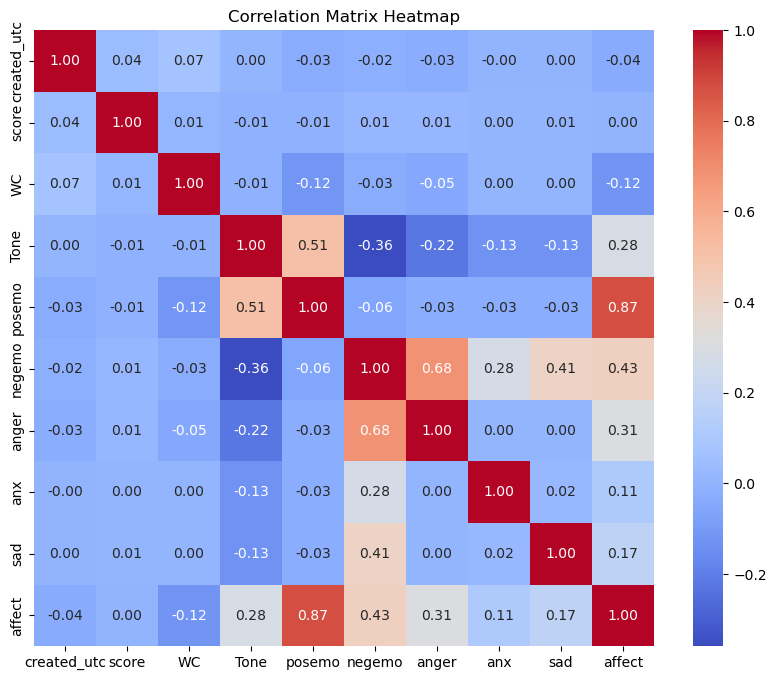

In [22]:
#only using numerical values for heatmap 

df_comments1 = df_comments.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_comments1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [23]:
#Checking for outliers, using min, max, and unique values for comments dataframe

numerical_df_s = df_submissions.select_dtypes(include=['int', 'float'])

# Iterate through each numerical column
for column in numerical_df_s.columns:
    # Calculate min and max range of unique values
    min_val = numerical_df_s[column].min()
    max_val = numerical_df_s[column].max()
    med_val = numerical_df_s[column].median()
    avg_val = numerical_df_s[column].mean()
    unique_values = numerical_df_s[column].nunique()
    
    # Print the results
    print(f"{column}, -- Min: {min_val}, -- Max: {max_val}, -- Median: {med_val}, -- Mean Values: {avg_val}, -- Unique Values: {unique_values}")


created_utc, -- Min: 1561436002.0, -- Max: 1659066615.0, -- Median: 1610932350.0, -- Mean Values: 1611151381.68346, -- Unique Values: 79580
score, -- Min: 0, -- Max: 512, -- Median: 1.0, -- Mean Values: 1.7921153701332933, -- Unique Values: 200
WC, -- Min: 0.0, -- Max: 69.0, -- Median: 6.0, -- Mean Values: 8.599505484850766, -- Unique Values: 70
Tone, -- Min: 0.0, -- Max: 99.0, -- Median: 25.77, -- Mean Values: 33.70403469136732, -- Unique Values: 120
posemo, -- Min: 0.0, -- Max: 100.0, -- Median: 0.0, -- Mean Values: 2.9266209804955188, -- Unique Values: 198
negemo, -- Min: 0.0, -- Max: 100.0, -- Median: 0.0, -- Mean Values: 2.9436866480909702, -- Unique Values: 196
anger, -- Min: 0.0, -- Max: 100.0, -- Median: 0.0, -- Mean Values: 0.8442611140397117, -- Unique Values: 126
anx, -- Min: 0.0, -- Max: 100.0, -- Median: 0.0, -- Mean Values: 0.38604864824158447, -- Unique Values: 106
sad, -- Min: 0.0, -- Max: 100.0, -- Median: 0.0, -- Mean Values: 0.4738239576273314, -- Unique Values: 106


In [24]:
# unique_posemo_values = df_submissions['posemo'].unique()

# # Sort the unique values in ascending order
# unique_posemo_values_sorted = sorted(unique_posemo_values)

# # Print the sorted list of unique values
# print("Unique values in posemo column (in ascending order):", unique_posemo_values_sorted)

# # Getting the median of the posemo score 

# posemo_median = statistics.median(unique_posemo_values_sorted)
# print("Median of posemo values:", posemo_median)


In [25]:
#Checking for outliers, using min, max, and unique values for comments dataframe

numerical_df_c = df_comments.select_dtypes(include=['int', 'float'])

# Iterate through each numerical column
for column in numerical_df_c.columns:
    # Calculate min and max range of unique values
    min_val = numerical_df_c[column].min()
    max_val = numerical_df_c[column].max()
    unique_values = numerical_df_c[column].nunique()
    
    # Print the results
    print(f"{column}, -- Min: {min_val}, -- Max: {max_val}, -- Unique Values: {unique_values}")

created_utc, -- Min: 1561435211, -- Max: 1659067065, -- Unique Values: 1005848
score, -- Min: -105, -- Max: 217, -- Unique Values: 188
WC, -- Min: 0, -- Max: 1935, -- Unique Values: 1049
Tone, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 4364
posemo, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 1264
negemo, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 1267
anger, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 886
anx, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 596
sad, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 618
affect, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 1709


In [26]:
# unique_posemo_values = df_comments['posemo'].unique()

# # Sort the unique values in ascending order
# unique_posemo_values_sorted = sorted(unique_posemo_values)

# # Print the sorted list of unique values
# print("Unique values in posemo column (in ascending order):", unique_posemo_values_sorted)

# # Getting the median of the posemo score 

# posemo_median = statistics.median(unique_posemo_values_sorted)
# print("Median of posemo values:", posemo_median)


In [27]:
# # Assuming df_submissions is your DataFrame
# df_submissions['posemo_threshold'] = (df_submissions['posemo'] >= 10).astype(int)
# df_comments['posemo_threshold'] = (df_submissions['posemo'] >= 6.575).astype(int)

In [28]:
import datetime
import pandas as pd

# Define the extract_datetime function
def extract_datetime(row):
    timestamp = row['created_utc']
    dt_object = datetime.datetime.fromtimestamp(timestamp)
    return dt_object

# Assuming df_submissions and df_comments are your DataFrames
# Apply the function to each row in df_submissions and create a new column 'Datetime'
df_submissions['Datetime'] = df_submissions.apply(extract_datetime, axis=1)

# Apply the function to each row in df_comments and create a new column 'Datetime'
df_comments['Datetime'] = df_comments.apply(extract_datetime, axis=1)

# Define the bins for the seasons based on days of the year
seasons_bins = [0, 80, 172, 264, 355, 366]
seasons_labels = ['Winter', 'Spring', 'Summer', 'Fall', 'Winter']

# Add the values to the season column for df_submissions
df_submissions['season'] = pd.cut(df_submissions['Datetime'].dt.dayofyear, bins=seasons_bins, labels=seasons_labels, ordered=False)

# Add the values to the season column for df_comments
df_comments['season'] = pd.cut(df_comments['Datetime'].dt.dayofyear, bins=seasons_bins, labels=seasons_labels, ordered=False)

# Drop the 'created_utc' column from both DataFrames if needed
# df_submissions.drop('created_utc', axis=1, inplace=True)
# df_comments.drop('created_utc', axis=1, inplace=True)


In [29]:
#DateTime to get month name and year 
df_submissions['Datetime'] = pd.to_datetime(df_submissions['Datetime'])

# Extract month name and year into separate columns
df_submissions['Month'] = df_submissions['Datetime'].dt.strftime('%B') 
df_submissions['Year'] = df_submissions['Datetime'].dt.strftime('%Y')  

df_comments['Datetime'] = pd.to_datetime(df_comments['Datetime'])

df_comments['Month'] = df_comments['Datetime'].dt.strftime('%B') 
df_comments['Year'] = df_comments['Datetime'].dt.strftime('%Y')  

df_submissions = df_submissions.dropna()
df_comments = df_comments.dropna()


In [30]:
df_comments

,author,created_utc,score,WC,Tone,posemo,negemo,anger,anx,sad,affect,Datetime,season,Month,Year
0,BoofDontShoot,1659067065,1,5,25.77,0.00,0.00,0.00,0.0,0.00,0.00,2022-07-28 23:57:45,Summer,July,2022
1,Busy_Background_195,1659067044,1,55,1.00,1.82,5.45,3.64,0.0,1.82,7.27,2022-07-28 23:57:24,Summer,July,2022
2,Wolf_Double,1659066949,1,6,99.00,33.33,0.00,0.00,0.0,0.00,33.33,2022-07-28 23:55:49,Summer,July,2022
3,Knowagoraaa,1659066905,1,39,73.64,2.56,0.00,0.00,0.0,0.00,2.56,2022-07-28 23:55:05,Summer,July,2022
4,Busy_Background_195,1659066875,1,75,2.41,2.67,5.33,0.00,0.0,2.67,8.00,2022-07-28 23:54:35,Summer,July,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014392,Virgowitch,1561435458,2,5,99.00,20.00,0.00,0.00,0.0,0.00,20.00,2019-06-25 00:04:18,Summer,June,2019
1014393,DrewSkii1010,1561435416,1,9,99.00,11.11,0.00,0.00,0.0,0.00,11.11,2019-06-25 00:03:36,Summer,June,2019
1014394,erischilde,1561435383,1,104,43.27,1.92,0.96,0.96,0.0,0.00,2.88,2019-06-25 00:03:03,Summer,June,2019
1014395,dingobaybees,1561435314,3,44,25.77,2.27,2.27,0.00,0.0,0.00,6.82,2019-06-25 00:01:54,Summer,June,2019


In [31]:
df_submissions

,author,title,created_utc,score,WC,Tone,posemo,negemo,anger,anx,sad,affect,Datetime,season,Month,Year
0,Odd-Pizza-1079,How much tylenol is too much? Asking for a fri...,1.659067e+09,1,12.0,25.77,0.00,0.00,0.00,0.00,0.00,0.00,2022-07-28 23:50:15,Summer,July,2022
1,Global_Face_4708,Gabapentin/Lyrica/Clonidine Through Telehealth?,1.659065e+09,1,5.0,25.77,0.00,0.00,0.00,0.00,0.00,0.00,2022-07-28 23:22:43,Summer,July,2022
2,Bluebeamtwinfn,Opiates prolonging finish/enhancing sex,1.659064e+09,1,5.0,25.77,0.00,0.00,0.00,0.00,0.00,0.00,2022-07-28 23:06:11,Summer,July,2022
3,iLoveLuckiii,Boost your oxy high! &amp; Save money! (USE ON...,1.659063e+09,1,13.0,99.00,7.69,0.00,0.00,0.00,0.00,7.69,2022-07-28 22:49:43,Summer,July,2022
4,Downtown_Syrup4635,IOP Detox while working 9-5??,1.659061e+09,1,6.0,25.77,0.00,0.00,0.00,0.00,0.00,0.00,2022-07-28 22:21:57,Summer,July,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79671,Kriskross88,I started nodding in front of my friend last n...,1.561437e+09,6,38.0,1.00,0.00,10.53,2.63,2.63,5.26,10.53,2019-06-25 00:32:36,Summer,June,2019
79672,Jupiterjigs1,Best way to use oxy 30s?,1.561437e+09,3,6.0,99.00,16.67,0.00,0.00,0.00,0.00,16.67,2019-06-25 00:32:34,Summer,June,2019
79673,FBIintern,Is it me or not many homosexual use Opiates?,1.561437e+09,0,9.0,25.77,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-25 00:23:52,Summer,June,2019
79674,AutomaticBrick3,Stamp bags review,1.561436e+09,0,3.0,25.77,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-25 00:17:35,Summer,June,2019


In [32]:
import pandas as pd

# Assuming df_submissions is your DataFrame
# Load your DataFrame or create it
# Example:
# df_submissions = pd.read_csv('your_file.csv')

# Sort the DataFrame based on the 'score' column in descending order
df_sorted = df_submissions.sort_values(by='score', ascending=False)

# Select the top 10 highest scores
top_10_highest_scores = df_sorted.head(10)

# Display the selected columns
selected_columns = ['author', 'title', 'score', 'season']
top_10_highest_scores[selected_columns]


,author,title,score,season
73791,Ghibliholic,Hey guys i hate to ask but please can i get a ...,512,Summer
54691,videoverse,Ah the nostalgia.,493,Spring
72450,cam32596,Firefighter/EMT here,481,Fall
54800,PlsnoticeMefelix,"Got My 90, 1st one I've gotten in 10 years of ...",399,Spring
71227,lockedupa_broad,I hooked up with a girl in a vinyl bunny suit ...,365,Fall
77838,FreeIfUboofIT,What have I become?,345,Summer
52076,Dopelesshopefiend201,Any Bojack Horseman fans?,299,Summer
76033,spinderella69,"Reminder, DO NOT use Google anymore as your se...",297,Summer
77209,CokecanDan87,Time to give it up....,295,Summer
71958,mdadam621,This is inspiring. A formerly incarcerated opi...,288,Fall


In [33]:
#Natural Language Processing for Title columns 

nltk.download('stopwords')
swords = stopwords.words('english')
#Removing the word 'not' to avoid consfusion from negative to positive sentiment
swords.remove('not')

df_submissions['title'] = df_submissions['title'].apply(lambda x: re.sub(r'[^a-zA-Z\d\s.]', '', x.lower()))
df_submissions['title'] = df_submissions['title'].apply(lambda x: x.replace('.', ' '))
df_submissions['title'] = df_submissions['title'].apply(lambda x: ' '.join([t for t in x.split(' ') if (t not in swords) and len(t) > 1]))
df_submissions['title'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amadouyehara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    much tylenol much asking friend actually
1        gabapentinlyricaclonidine telehealth
2      opiates prolonging finishenhancing sex
3           boost oxy high amp save money use
4                        iop detox working 95
Name: title, dtype: object

In [34]:
docs = df_submissions['title'].tolist()

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

print(topic_model.get_topic_info())

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

      Topic  Count                                         Name  \
0        -1  24932                         -1_took_ive_ago_take   
1         0    638          0_addiction_addict_addicts_addicted   
2         1    377              1_opiates_opiate_seasoned_spicy   
3         2    335         2_opioids_opioid_opioidopiate_opiods   
4         3    270                          3_weve_xx_sh_notice   
...     ...    ...                                          ...   
1401   1400     10           1400_bruddas_quick_checkup_answers   
1402   1401     10           1401_detoxify_foundry_strategy_icu   
1403   1402     10      1402_pins_needles_pinsneedles_sensation   
1404   1403     10   1403_succesful_temporarily_necessary_taper   
1405   1404     10  1404_acidshrooms_periodd_acidity_huntington   

                                         Representation  \
0     [took, ive, ago, take, hours, last, im, mg, li...   
1     [addiction, addict, addicts, addicted, recover...   
2     [opiates, op

In [35]:
topic_model.visualize_barchart(top_n_topics=9, n_words=10, width=650, height=650)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [36]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

df_submissions['title_polarity'] = df_submissions['title'].apply(lambda x: round((nlp(x))._.blob.polarity, 2))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


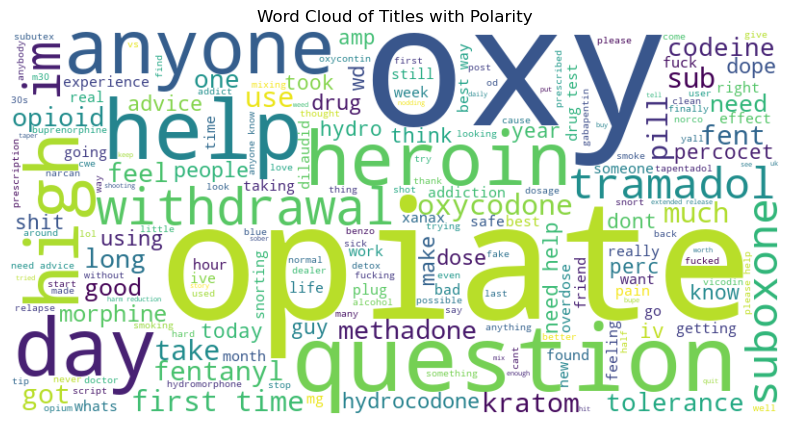

In [37]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data_with_polarity = ' '.join(df_submissions['title'] + ' ' + df_submissions['title_polarity'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data_with_polarity)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Titles with Polarity')
plt.show()

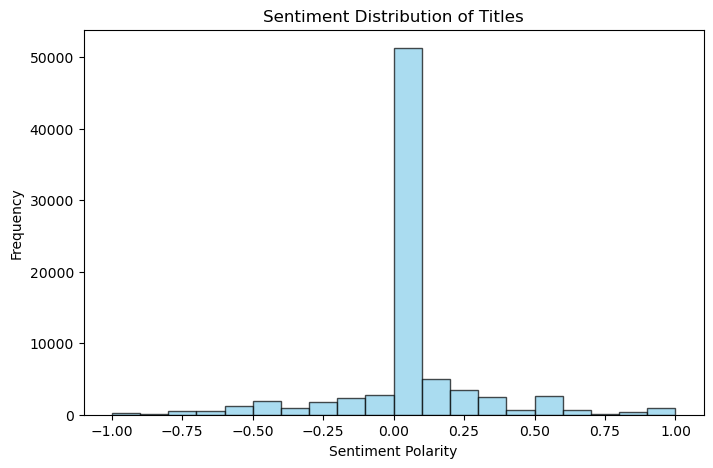

In [38]:
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt

# Assuming you have already executed the code to extract topics and polarity
# docs = df_submissions['title'].tolist()
# topic_model = BERTopic()
# topics, probs = topic_model.fit_transform(docs)

# Combine titles with their polarities into a single string
text_data_with_sentiment = ' '.join(df_submissions['title'])

# Perform sentiment analysis on the combined text data
sentiment_scores = [TextBlob(title).sentiment.polarity for title in df_submissions['title']]
df_submissions['title_sentiment'] = sentiment_scores


# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.hist(df_submissions['title_sentiment'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution of Titles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


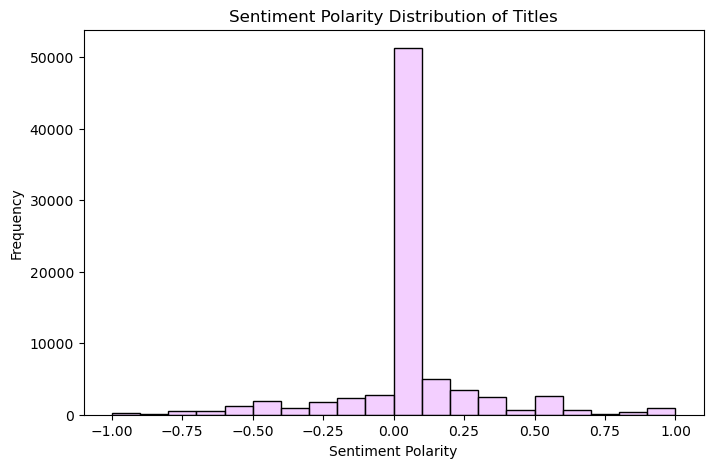

In [39]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sentiment polarity for each title
df_submissions['title_sentiment'] = df_submissions['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.histplot(df_submissions['title_sentiment'], bins=20, color='#F0BFFF')
plt.title('Sentiment Polarity Distribution of Titles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [40]:
#Main Task #1: Random Forest Calssifier to predict scores based off of positive and negative emotion

#Submissions

# Convert 'score' column to numeric, setting errors='coerce' to convert non-numeric values to NaN
# Then drop rows with NaN in 'score'
df_submissions['score'] = pd.to_numeric(df_submissions['score'], errors='coerce')
df_submissions.dropna(subset=['score'], inplace=True)

# Splitting the data
X = df_submissions[['posemo', 'negemo','title_polarity']]
y = df_submissions['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)

lrg = LogisticRegression(random_state=42)
lrg.fit(X_train,y_train)

y_pred_lrg = lrg.predict(X_test)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predicting on the test set
y_pred_dtc = dtc.predict(X_test)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

#Creating predictive column
df_submissions['predicted_score_clf'] = clf.predict(X)
df_submissions['predicted_score_lrg'] = lrg.predict(X)
df_submissions['predicted_score_dtc'] = dtc.predict(X)
df_submissions['predicted_score_gbc'] = dtc.predict(X)

#Accruacy Score 
accuracy_clf = accuracy_score(y_test, y_pred_clf)
print('RFC Accuracy:', accuracy_clf)
accuracy_lrg = accuracy_score(y_test, y_pred_lrg)
print('LRG Accuracy:', accuracy_lrg)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print('DTC Accuracy:', accuracy_dtc)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print('GBC Accuracy:', accuracy_gbc)

RFC Accuracy: 0.8992783181675557
LRG Accuracy: 0.902353310323188
DTC Accuracy: 0.8958895513021651
GBC Accuracy: 0.7258236586131158


In [41]:
df_submissions

,author,title,created_utc,score,WC,Tone,posemo,negemo,anger,anx,...,Datetime,season,Month,Year,title_polarity,title_sentiment,predicted_score_clf,predicted_score_lrg,predicted_score_dtc,predicted_score_gbc
0,Odd-Pizza-1079,much tylenol much asking friend actually,1.659067e+09,1,12.0,25.77,0.00,0.00,0.00,0.00,...,2022-07-28 23:50:15,Summer,July,2022,0.13,0.133333,1,1,1,1
1,Global_Face_4708,gabapentinlyricaclonidine telehealth,1.659065e+09,1,5.0,25.77,0.00,0.00,0.00,0.00,...,2022-07-28 23:22:43,Summer,July,2022,0.00,0.000000,1,1,1,1
2,Bluebeamtwinfn,opiates prolonging finishenhancing sex,1.659064e+09,1,5.0,25.77,0.00,0.00,0.00,0.00,...,2022-07-28 23:06:11,Summer,July,2022,0.00,0.000000,1,1,1,1
3,iLoveLuckiii,boost oxy high amp save money use,1.659063e+09,1,13.0,99.00,7.69,0.00,0.00,0.00,...,2022-07-28 22:49:43,Summer,July,2022,0.16,0.160000,1,1,1,1
4,Downtown_Syrup4635,iop detox working 95,1.659061e+09,1,6.0,25.77,0.00,0.00,0.00,0.00,...,2022-07-28 22:21:57,Summer,July,2022,0.00,0.000000,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79671,Kriskross88,started nodding front friend last night kept s...,1.561437e+09,6,38.0,1.00,0.00,10.53,2.63,2.63,...,2019-06-25 00:32:36,Summer,June,2019,-0.26,-0.263333,6,1,6,6
79672,Jupiterjigs1,best way use oxy 30s,1.561437e+09,3,6.0,99.00,16.67,0.00,0.00,0.00,...,2019-06-25 00:32:34,Summer,June,2019,1.00,1.000000,1,1,1,1
79673,FBIintern,not many homosexual use opiates,1.561437e+09,0,9.0,25.77,0.00,0.00,0.00,0.00,...,2019-06-25 00:23:52,Summer,June,2019,-0.25,-0.250000,1,1,1,1
79674,AutomaticBrick3,stamp bags review,1.561436e+09,0,3.0,25.77,0.00,0.00,0.00,0.00,...,2019-06-25 00:17:35,Summer,June,2019,0.00,0.000000,1,1,1,1


In [42]:
#Main Task #1: Random Forest Calssifier to predict scores based off of positive and negative emotion

#Submissions

# Convert 'score' column to numeric, setting errors='coerce' to convert non-numeric values to NaN
# Then drop rows with NaN in 'score'
df_submissions['score'] = pd.to_numeric(df_submissions['score'], errors='coerce')
df_submissions.dropna(subset=['score'], inplace=True)

# Splitting the data
X = df_submissions[['posemo', 'negemo','title_polarity','affect','anger','sad','anx']]
y = df_submissions['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)

lrg = LogisticRegression(random_state=42)
lrg.fit(X_train,y_train)

y_pred_lrg = lrg.predict(X_test)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predicting on the test set
y_pred_dtc = dtc.predict(X_test)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

#Creating predictive column
df_submissions['predicted_score_clf'] = clf.predict(X)
df_submissions['predicted_score_lrg'] = lrg.predict(X)
df_submissions['predicted_score_dtc'] = dtc.predict(X)
df_submissions['predicted_score_gbc'] = dtc.predict(X)

#Accruacy Score 
accuracy_clf = accuracy_score(y_test, y_pred_clf)
print('RFC Accuracy:', accuracy_clf)
accuracy_lrg = accuracy_score(y_test, y_pred_lrg)
print('LRG Accuracy:', accuracy_lrg)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print('DTC Accuracy:', accuracy_dtc)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print('GBC Accuracy:', accuracy_gbc)

RFC Accuracy: 0.8991528082836523
LRG Accuracy: 0.9021650454973329
DTC Accuracy: 0.8934421085660496
GBC Accuracy: 0.7922183871979919


In [43]:
#Feature Importance
features = ['posemo', 'negemo','title_polarity','affect','anger','sad','anx']
feature_importances = clf.feature_importances_

# Mapping feature importances
feature_importance_dict = dict(zip(features, feature_importances))

print('Feature Importances:')
for feature, importance in feature_importance_dict.items():
    print(f'{feature}: {importance:.4f}')

Feature Importances:
posemo: 0.0830
negemo: 0.0927
title_polarity: 0.5577
affect: 0.1311
anger: 0.0552
sad: 0.0456
anx: 0.0346


In [44]:
#Main Task #1: Random Forest Calssifier to predict scores based off of positive and negative emotion

#Comments

# Convert 'score' column to numeric, setting errors='coerce' to convert non-numeric values to null
# Then drop rows with NaN in 'score'
df_comments['score'] = pd.to_numeric(df_comments['score'], errors='coerce')
df_comments.dropna(subset=['score'], inplace=True)


# Splitting the data
X = df_comments[['posemo', 'negemo','anger','anx','sad', 'affect','Tone']]
y = df_comments['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)

lrg = LogisticRegression(random_state=42)
lrg.fit(X_train,y_train)

y_pred_lrg = lrg.predict(X_test)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predicting on the test set
y_pred_dtc = dtc.predict(X_test)

#Creating predictive column
df_comments['predicted_score_clf'] = clf.predict(X)
df_comments['predicted_score_lrg'] = lrg.predict(X)
df_comments['predicted_score_dtc'] = dtc.predict(X)

#Accruacy Score 
accuracy_clf = accuracy_score(y_test, y_pred_clf)
print('RFC Accuracy:', accuracy_clf)
accuracy_lrg = accuracy_score(y_test, y_pred_lrg)
print('LRG Accuracy:', accuracy_lrg)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print('DTC Accuracy:', accuracy_dtc)

RFC Accuracy: 0.8015772870662461
LRG Accuracy: 0.8083694794952682
DTC Accuracy: 0.7912016955835962


In [45]:
#Feature Importance
features = ['posemo', 'negemo','anger','anx','sad','affect','Tone']
feature_importances = clf.feature_importances_

# Mapping feature importances
feature_importance_dict = dict(zip(features, feature_importances))

print('Feature Importances:')
for feature, importance in feature_importance_dict.items():
    print(f'{feature}: {importance:.4f}')

Feature Importances:
posemo: 0.1504
negemo: 0.1636
anger: 0.1371
anx: 0.1165
sad: 0.1303
affect: 0.1902
Tone: 0.1118


In [46]:
# df_submissions.to_csv('df_submissions.csv', index=False)

In [47]:
df_comments2 = df_comments[['score', 'WC', 'Tone','posemo', 'negemo','anx', 'sad', 'anger', 'season']]
df_submissions2 = df_submissions[['score', 'Tone','posemo', 'negemo', 'anx', 'sad', 'anger','season']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_submissions2['season'] = le.fit_transform(df_submissions2['season']) #spring = 1, Fall = 0, summer =2, winter = 3

In [ ]:
wintersub = df_submissions2[df_submissions2['season'] == 3]
springsub = df_submissions2[df_submissions2['season'] == 1]
summersub = df_submissions2[df_submissions2['season'] == 2]
fallsub = df_submissions2[df_submissions2['season'] == 0]

In [ ]:
wintersub.dropna()
springsub.dropna()
summersub.dropna()
fallsub.dropna()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Standardize the 'col1' column (center and scale)
wintersub['score'] = scaler.fit_transform(wintersub[['score']])
springsub['score'] = scaler.fit_transform(springsub[['score']])
summersub['score'] = scaler.fit_transform(summersub[['score']])
fallsub['score'] = scaler.fit_transform(fallsub[['score']])

In [ ]:
features_wintersub = pd.concat([wintersub[['score']], wintersub['posemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_wintersub)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_wintersub['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_wintersub['score'],
    y=features_wintersub['posemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Positive Emotion Score')
plt.title('Winter Submissions K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_wintersub = pd.concat([wintersub[['score']], wintersub['negemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_wintersub)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_wintersub['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_wintersub['score'],
    y=features_wintersub['negemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Negative Emotion Score')
plt.title('Winter Submissions K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

In [ ]:
features_springsub = pd.concat([springsub[['score']], springsub['posemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_springsub)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_springsub['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_springsub['score'],
    y=features_springsub['posemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Positive Emotion Score')
plt.title('Spring Submissions K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_springsub = pd.concat([springsub[['score']], springsub['negemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_springsub)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_springsub['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_springsub['score'],
    y=features_springsub['negemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Negative Emotion Score')
plt.title('Spring Submissions K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

In [ ]:
features_fallsub = pd.concat([fallsub[['score']], fallsub['posemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_fallsub)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_fallsub['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_fallsub['score'],
    y=features_fallsub['posemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Positive Emotion Score')
plt.title('Fall Submissions K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_fallsub = pd.concat([fallsub[['score']], fallsub['negemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_fallsub)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_fallsub['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_fallsub['score'],
    y=features_fallsub['negemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Negative Emotion Score')
plt.title('Fall Submissions K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

In [ ]:
features_summersub = pd.concat([summersub[['score']], summersub['posemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_summersub)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_summersub['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_summersub['score'],
    y=features_summersub['posemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Positive Emotion Score')
plt.title('Summer Submissions K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_summersub = pd.concat([summersub[['score']], summersub['negemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_summersub)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_summersub['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_summersub['score'],
    y=features_summersub['negemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Negative Emotion Score')
plt.title('Summer Submissions K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

In [ ]:
print(centroids)

In [ ]:
df_comments2

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_comments2['season'] = le.fit_transform(df_comments2['season']) #spring = 1, Fall = 0, summer =2, winter = 3
df_comments2.head()

In [ ]:
wintercom = df_comments2[df_comments2['season'] == 3]
springcom = df_comments2[df_comments2['season'] == 1]
summercom = df_comments2[df_comments2['season'] == 2]
fallcom = df_comments2[df_comments2['season'] == 0]

In [ ]:
wintercom.dropna()
springcom.dropna()
summercom.dropna()
fallcom.dropna()

In [ ]:
scaler = MinMaxScaler()


# Standardize the 'col1' column (center and scale)
wintercom['score'] = scaler.fit_transform(wintercom[['score']])
springcom['score'] = scaler.fit_transform(springcom[['score']])
summercom['score'] = scaler.fit_transform(summercom[['score']])
fallcom['score'] = scaler.fit_transform(fallcom[['score']])

In [ ]:
features_wintercom = pd.concat([wintercom[['score']], wintercom['posemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_wintercom)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_wintercom['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_wintercom['score'],
    y=features_wintercom['posemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Positive Emotion Score')
plt.title('Winter Comments K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_wintercom = pd.concat([wintercom[['score']], wintercom['negemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_wintercom)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_wintercom['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_wintercom['score'],
    y=features_wintercom['negemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Negative Emotion Score')
plt.title('Winter Comments K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_springcom = pd.concat([springcom[['score']], springcom['posemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_springcom)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_springcom['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_springcom['score'],
    y=features_springcom['posemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Positive Emotion Score')
plt.title('Spring Comments K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_springcom = pd.concat([springcom[['score']], springcom['negemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_springcom)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_springcom['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_springcom['score'],
    y=features_springcom['negemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Negative Emotion Score')
plt.title('Spring Comments K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_fallcom = pd.concat([fallcom[['score']], fallsub['posemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_fallcom)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_fallcom['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_fallcom['score'],
    y=features_fallcom['posemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Positive Emotion Score')
plt.title('Fall Comments K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_fallcom = pd.concat([fallcom[['score']], fallcom['negemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_fallcom)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_fallcom['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_fallcom['score'],
    y=features_fallcom['negemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Negative Emotion Score')
plt.title('Fall Comments K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_summercom = pd.concat([summercom[['score']], summercom['posemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_summercom)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_summercom['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_summercom['score'],
    y=features_summercom['posemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Positive Emotion Score')
plt.title('Summer Comments K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()

features_summercom = pd.concat([summercom[['score']], summercom['negemo']], axis=1)

# Define the number of clusters (k)
k = 4  # Example: 4 clusters

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set a random seed for reproducibility

# Fit the model to your data
kmeans.fit(features_summercom)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centers (centroids) after fitting (optional)
centroids = kmeans.cluster_centers_

features_summercom['cluster'] = cluster_labels

print("Centroids:")
print(centroids)

import seaborn as sns


# Create a scatter plot using Seaborn
sns.scatterplot(
    x=features_summercom['score'],
    y=features_summercom['negemo'],
    hue=kmeans.labels_,  # Color based on cluster labels
    palette='deep',  # Choose a color palette (adjust as desired)
    #style=kmeans.labels_,  # Marker style can also be based on cluster labels (optional)
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust marker transparency
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidths=5, c='black', label='Centroids')
# Add labels and title
plt.xlabel('Score')
plt.ylabel('Negative Emotion Score')
plt.title('Summer Comments K-Means Clustering Results (k=%d)' % k)

# Show the plot
plt.show()